# Financial Fraud Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Load DataSet

In [2]:
df = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Projects/Financial Fraud/financial_fraud_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [5]:
df.tail()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
9995,1076,482,58.366442,POS,Clothing,DE,12,0.066366,0.086344,0
9996,4995,904,139.502160,POS,Travel,DE,13,0.119014,0.285680,0
9997,3485,527,71.012122,Online,Travel,TR,8,0.119204,0.262262,0
9998,7922,771,21.031405,QR,Grocery,UK,12,0.027088,0.295243,0
9999,6451,429,54.028632,ATM,Electronics,DE,11,0.096438,0.042823,0


## Size of data

In [6]:
df.dtypes

transaction_id         int64
user_id                int64
amount               float64
transaction_type      object
merchant_category     object
country               object
hour                   int64
device_risk_score    float64
ip_risk_score        float64
is_fraud               int64
dtype: object

## Field Information

In [7]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'transaction_type',
       'merchant_category', 'country', 'hour', 'device_risk_score',
       'ip_risk_score', 'is_fraud'],
      dtype='object')

## Missing values and Duplicates

In [8]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values per column:
transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

Number of duplicate rows: 0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.0,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
user_id,10000.0,500.058700,288.328495,0.000000,247.000000,503.000000,750.250000,999.000000
amount,10000.0,178.142763,531.647950,1.000000,65.084753,101.686510,138.280872,11628.213881
hour,10000.0,14.247100,5.347383,0.000000,10.000000,14.000000,19.000000,23.000000
device_risk_score,10000.0,0.183773,0.177381,0.000030,0.075721,0.156583,0.234939,0.998737
ip_risk_score,10000.0,0.184669,0.175772,0.000009,0.077762,0.158290,0.236968,0.999603
is_fraud,10000.0,0.050000,0.217956,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
df.select_dtypes(include=np.number).corr()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
transaction_id,1.000000,-0.001360,0.242245,-0.070046,0.332211,0.332628,0.377492
user_id,-0.001360,1.000000,-0.008333,-0.022854,0.007316,0.004433,0.006165
amount,0.242245,-0.008333,1.000000,-0.100818,0.554977,0.549554,0.638435
hour,-0.070046,-0.022854,-0.100818,1.000000,-0.149832,-0.161670,-0.181448
device_risk_score,0.332211,0.007316,0.554977,-0.149832,1.000000,0.757978,0.871989
ip_risk_score,0.332628,0.004433,0.549554,-0.161670,0.757978,1.000000,0.870738
is_fraud,0.377492,0.006165,0.638435,-0.181448,0.871989,0.870738,1.000000


## Check the number of legitimate and fraudulent transactions and fraud ratio

In [11]:
# Count of fraud vs legitimate transactions
print(df['is_fraud'].value_counts())

# Fraud ratio
fraud_ratio = df['is_fraud'].mean()
print("Fraud ratio:", fraud_ratio)

is_fraud
0    9500
1     500
Name: count, dtype: int64
Fraud ratio: 0.05


## Basic statistics for numeric columns and compare fraud vs legitimate transactions

In [12]:
# Describe numeric columns
print(df[['amount', 'hour', 'device_risk_score', 'ip_risk_score']].describe())

# Group by fraud
print(df.groupby('is_fraud')[['amount', 'hour']].mean())

             amount          hour  device_risk_score  ip_risk_score
count  10000.000000  10000.000000       10000.000000   10000.000000
mean     178.142763     14.247100           0.183773       0.184669
std      531.647950      5.347383           0.177381       0.175772
min        1.000000      0.000000           0.000030       0.000009
25%       65.084753     10.000000           0.075721       0.077762
50%      101.686510     14.000000           0.156583       0.158290
75%      138.280872     19.000000           0.234939       0.236968
max    11628.213881     23.000000           0.998737       0.999603
               amount       hour
is_fraud                        
0          100.277751  14.469684
1         1657.577984  10.018000


## Distribution of transaction amounts for fraud and legitimate transactions

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


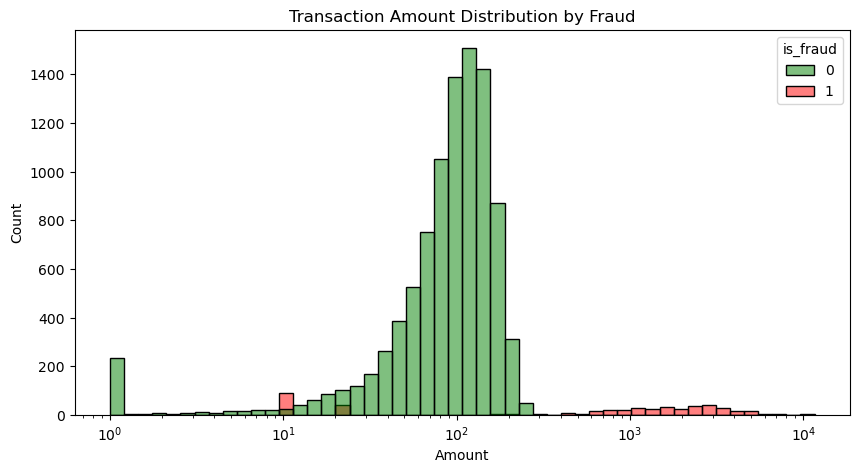

In [13]:
# Amount distribution by fraud
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amount', hue='is_fraud', bins=50, log_scale=True, palette=['green','red'])
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

## Number of transactions per hour, separated by fraud and legitimate labels

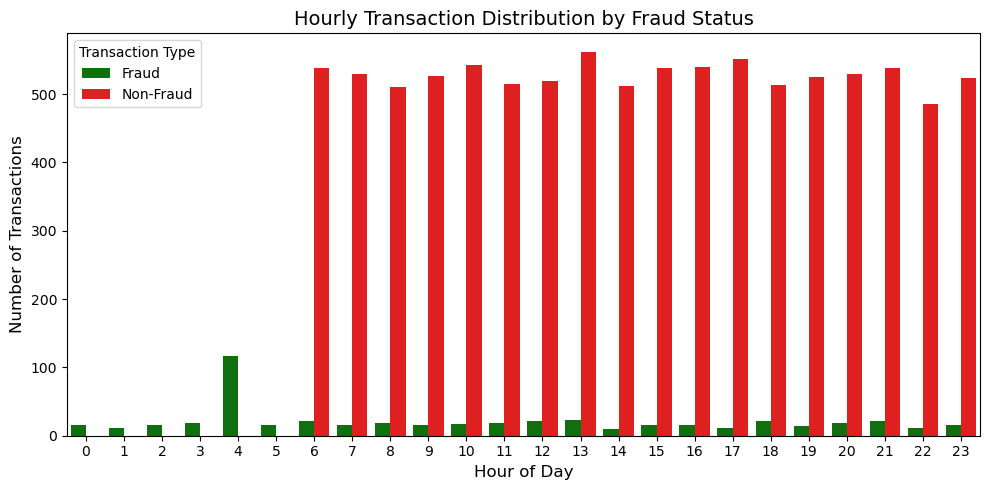

In [14]:
df['is_fraud_label'] = df['is_fraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Plot
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    data=df,
    x='hour',
    hue='is_fraud_label',
    palette=['green', 'red']
)

# Titles and labels
plt.title("Hourly Transaction Distribution by Fraud Status", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)


ax.legend(title="Transaction Type")

plt.tight_layout()
plt.show()


## Fraud vs Non-Fraud Distribution Across Transaction Types and Merchant Categories

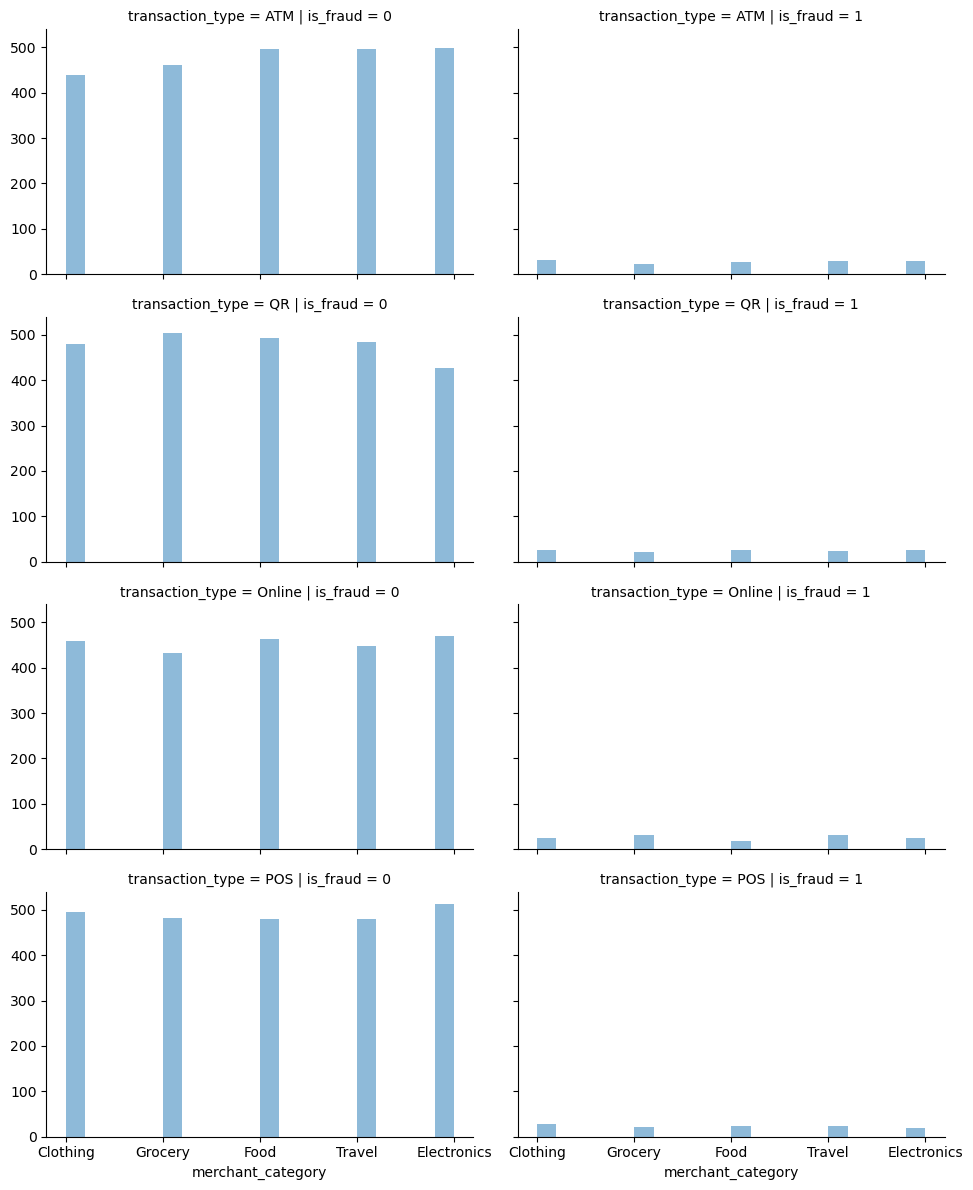

In [15]:
grid = sns.FacetGrid(df, col='is_fraud', row='transaction_type', aspect=1.6)
grid.map(plt.hist, 'merchant_category', alpha=.5, bins=20)
grid.add_legend()

## Fraud Rate by Merchant Category

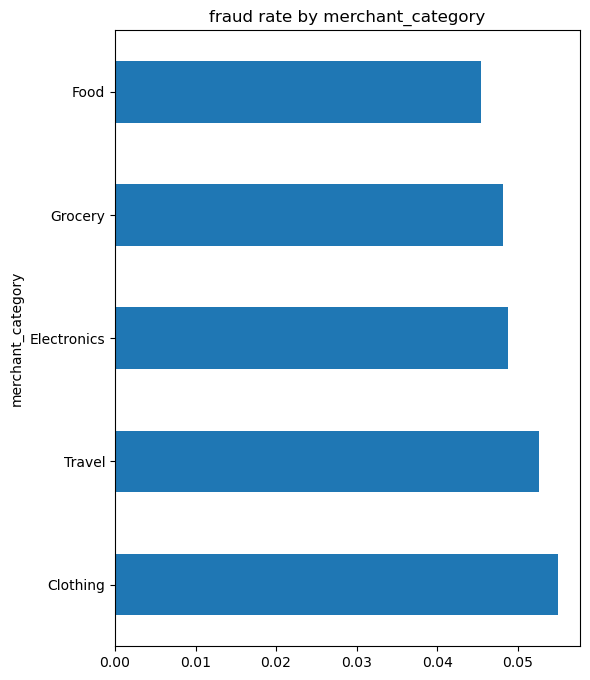

In [16]:
fraud_by_cat = df.groupby('merchant_category')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot.barh(figsize=(6,8))
plt.title('fraud rate by merchant_category')
plt.show()

## Distribution of Device and IP Risk Scores

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


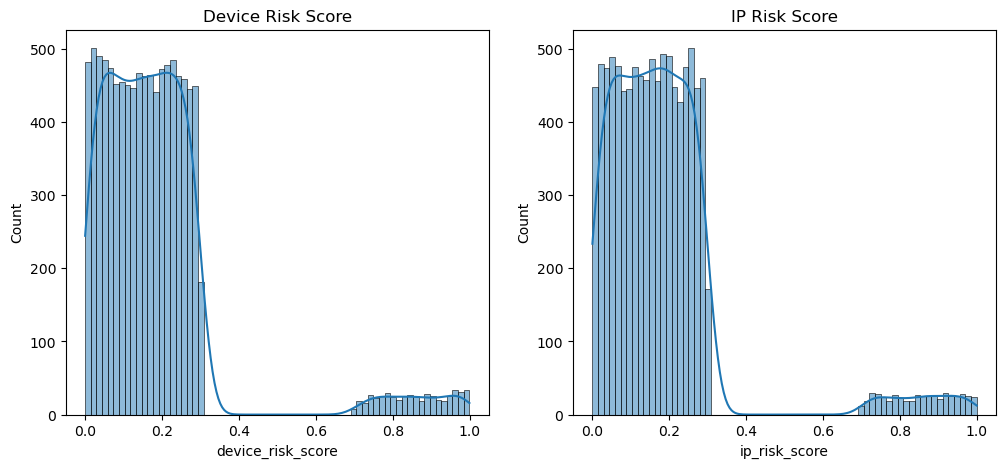

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['device_risk_score'], kde=True, ax=ax[0])
sns.histplot(df['ip_risk_score'], kde=True, ax=ax[1])
ax[0].set_title("Device Risk Score")
ax[1].set_title("IP Risk Score")
plt.show()

## Distribution of Transaction Types

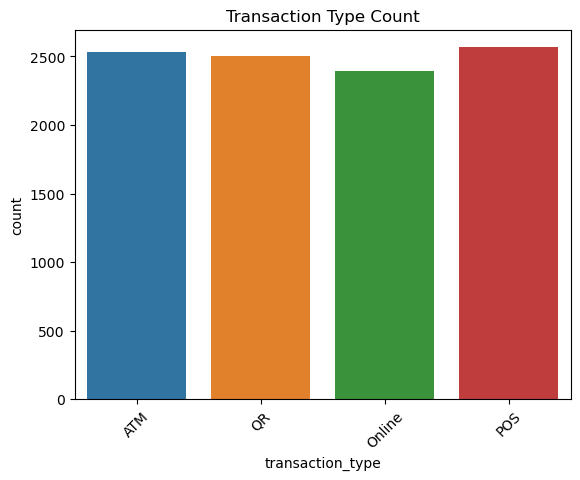

In [18]:
sns.countplot(data=df, x="transaction_type")
plt.title("Transaction Type Count")
plt.xticks(rotation=45)
plt.show()

## Merchant Category Distribution

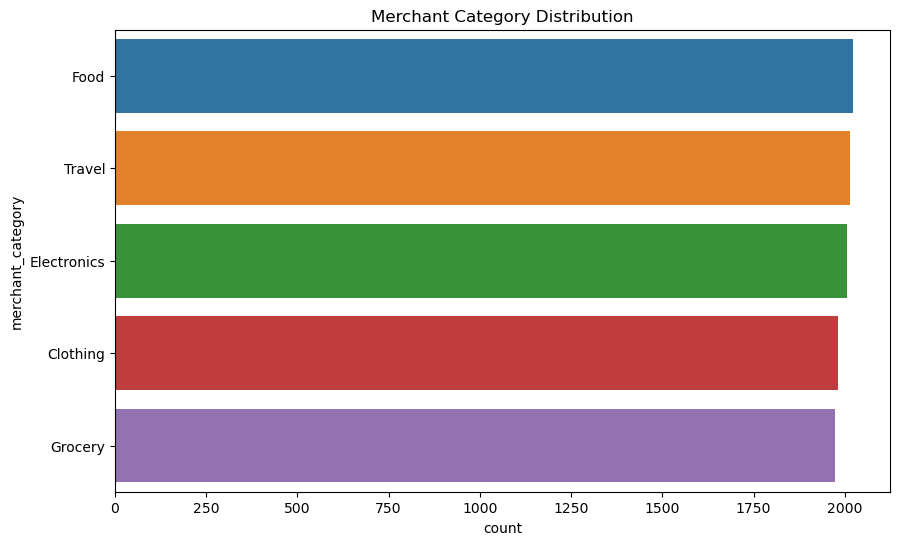

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="merchant_category", order=df['merchant_category'].value_counts().index)
plt.title("Merchant Category Distribution")
plt.show()

## Fraud and legitimate transaction counts per country.

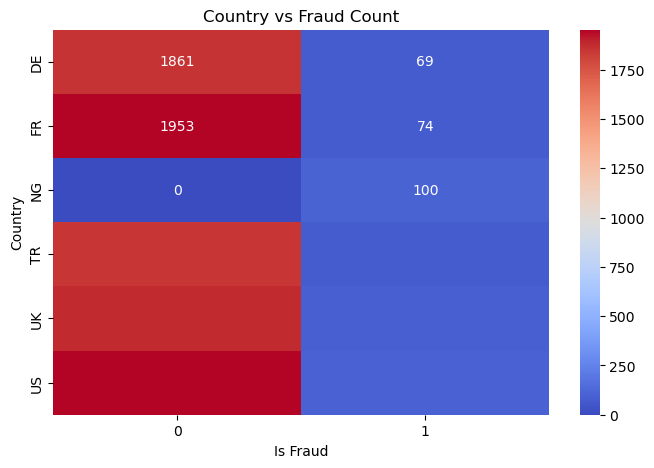

In [20]:
# Pivot table: country vs fraud
country_fraud = df.pivot_table(index='country', columns='is_fraud', values='transaction_id', aggfunc='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(country_fraud, annot=True, fmt='g', cmap='coolwarm')
plt.title("Country vs Fraud Count")
plt.xlabel("Is Fraud")
plt.ylabel("Country")
plt.show()

## Data Modelling

In [21]:
# Feature Engineering

def time_range(x):
    if 5 <= x <= 11:
        return "Morning"
    elif 12 <= x <= 17:
        return "Afternoon"
    elif 18 <= x <= 22:
        return "Evening"
    else:
        return "Night"

df["time_range"] = df["hour"].apply(time_range)

cat_cols = ["transaction_type", "merchant_category", "country", "time_range"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


### Prepare data

In [22]:
X = df.drop(
    columns=["is_fraud", "is_fraud_label", "transaction_id"],
    errors="ignore"
)
y = df["is_fraud"]


#Encode categorical columns FIRST

cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


feature_names = X.columns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)


## Train Multiple Model

In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Evaluate Models

In [24]:
def evaluate_model(model):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## Evaluate all model

----- Logistic Regression -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



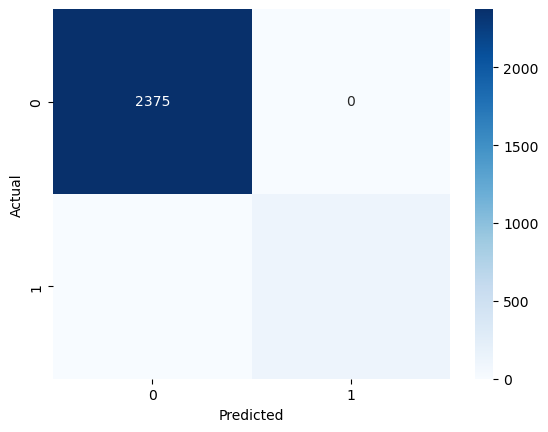

----- Random Forest -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



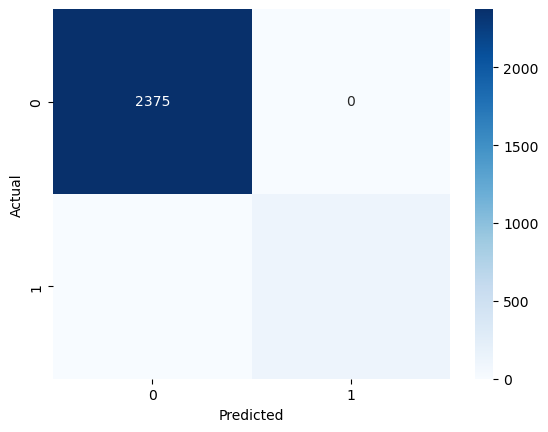

----- Decision Tree -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



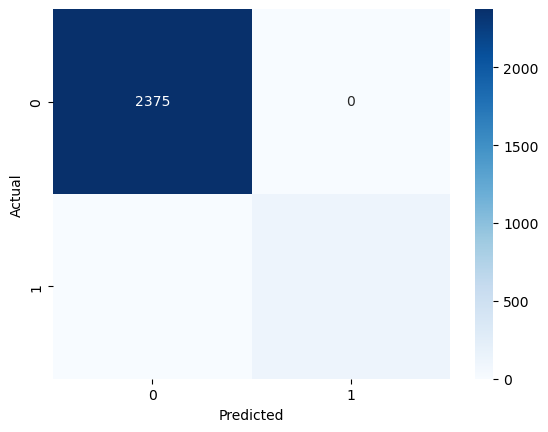

----- KNN -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



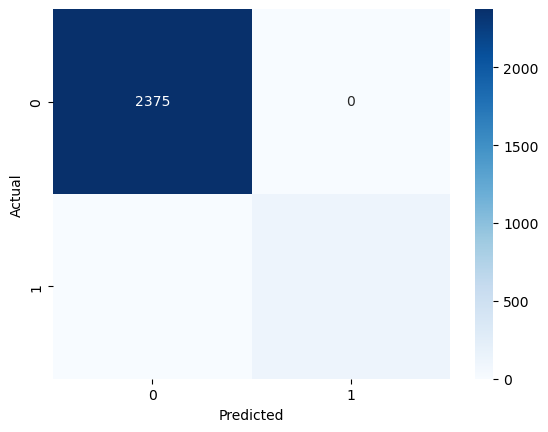

----- XGBoost -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00       125

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



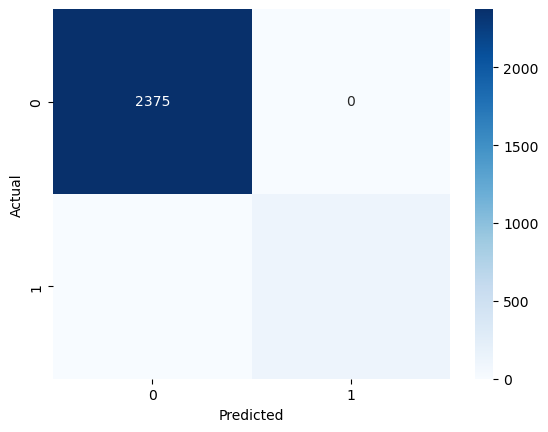

In [25]:
models = [lr, rf, dt, knn, xgb]
names = ["Logistic Regression", "Random Forest", "Decision Tree", "KNN", "XGBoost"]

for name, model in zip(names, models):
    print(f"----- {name} -----")
    evaluate_model(model)


## ROC–AUC Curve (Best Model – XGBoost)

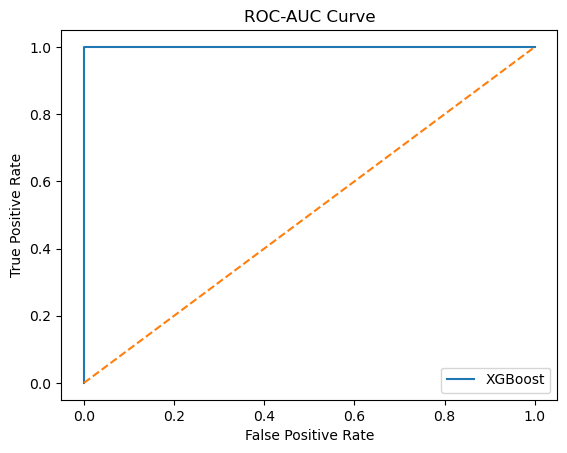

1.0

In [26]:
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

roc_auc_score(y_test, y_pred_prob)


## Predict fraud for 5 example transactions and visualize the results

   amount  hour  device_risk_score  ip_risk_score  predicted_is_fraud  \
0    1200     2               0.90           0.85                   1   
1      50    14               0.10           0.05                   0   
2    5000    23               0.95           0.90                   1   
3     300    10               0.20           0.15                   0   
4     800     1               0.80           0.75                   1   

  predicted_label  
0           Fraud  
1           Legit  
2           Fraud  
3           Legit  
4           Fraud  


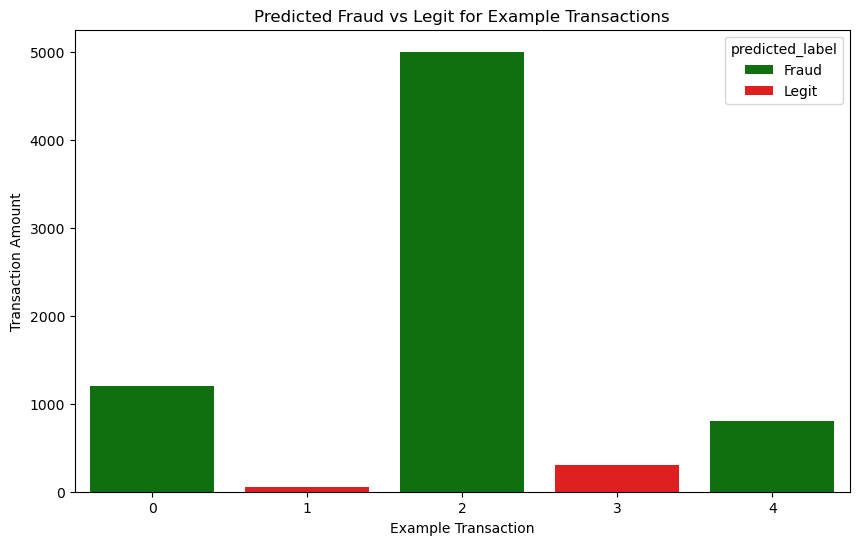

In [28]:
# Example new transactions
new_transactions = pd.DataFrame({
    'amount': [1200, 50, 5000, 300, 800],
    'hour': [2, 14, 23, 10, 1],
    'device_risk_score': [0.9, 0.1, 0.95, 0.2, 0.8],
    'ip_risk_score': [0.85, 0.05, 0.9, 0.15, 0.75]
})


# Create full feature frame using training features
new_X = pd.DataFrame(columns=X.columns)

# Fill known values
for col in new_transactions.columns:
    new_X[col] = new_transactions[col]

# Fill missing columns with 0
new_X = new_X.fillna(0)

new_X_scaled = scaler.transform(new_X)

# Make predictions
predictions = rf.predict(new_X_scaled)

new_transactions['predicted_is_fraud'] = predictions
new_transactions['predicted_label'] = new_transactions['predicted_is_fraud'].map(
    {1: 'Fraud', 0: 'Legit'}
)

print(new_transactions)


# Visualization

plt.figure(figsize=(10,6))
sns.barplot(
    x=new_transactions.index,
    y='amount',
    hue='predicted_label',
    data=new_transactions,
    dodge=False,
    palette=['green','red']
)

plt.title("Predicted Fraud vs Legit for Example Transactions")
plt.xlabel("Example Transaction")
plt.ylabel("Transaction Amount")
plt.show()


## Feature Importance (XGBoost)

In [ ]:

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature"
)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

